## Regression Problem: Student Performance

In [226]:
import numpy as np
import pandas as pd

### To-do:
1. Data prep
2. EDA
3. Validation framework
4. X preparation
5. Model training
6. RMSE
7. Regularization
8. Validating
9. Testing
10. Using

## 1. Data prep

In [227]:
df = pd.read_csv("../data/student-por.csv", sep=";")

In [228]:
df.columns = df.columns.str.lower()
df.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'pstatus', 'medu', 'fedu',
       'mjob', 'fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'dalc',
       'walc', 'health', 'absences', 'g1', 'g2', 'g3'],
      dtype='object')

In [229]:
cat_cols = list(df.dtypes[df.dtypes == "object"].index)

In [230]:
for c in cat_cols:
    df[c] = df[c].str.lower().str.replace(" ", "_")

In [231]:
df.head().T

,0,1,2,3,4
school,gp,gp,gp,gp,gp
sex,f,f,f,f,f
age,18,17,15,15,16
address,u,u,u,u,u
famsize,gt3,gt3,le3,gt3,gt3
pstatus,a,t,t,t,t
medu,4,1,1,4,3
fedu,4,1,1,2,3
mjob,at_home,at_home,at_home,health,other
fjob,teacher,other,other,services,other


### 2. EDA

In [232]:
from IPython.display import display
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [233]:
for c in df.columns:
    display(c)
    display(df[c].unique()[:5])
    display(df[c].nunique())

'school'

array(['gp', 'ms'], dtype=object)

2

'sex'

array(['f', 'm'], dtype=object)

2

'age'

array([18, 17, 15, 16, 19])

8

'address'

array(['u', 'r'], dtype=object)

2

'famsize'

array(['gt3', 'le3'], dtype=object)

2

'pstatus'

array(['a', 't'], dtype=object)

2

'medu'

array([4, 1, 3, 2, 0])

5

'fedu'

array([4, 1, 2, 3, 0])

5

'mjob'

array(['at_home', 'health', 'other', 'services', 'teacher'], dtype=object)

5

'fjob'

array(['teacher', 'other', 'services', 'health', 'at_home'], dtype=object)

5

'reason'

array(['course', 'other', 'home', 'reputation'], dtype=object)

4

'guardian'

array(['mother', 'father', 'other'], dtype=object)

3

'traveltime'

array([2, 1, 3, 4])

4

'studytime'

array([2, 3, 1, 4])

4

'failures'

array([0, 3, 1, 2])

4

'schoolsup'

array(['yes', 'no'], dtype=object)

2

'famsup'

array(['no', 'yes'], dtype=object)

2

'paid'

array(['no', 'yes'], dtype=object)

2

'activities'

array(['no', 'yes'], dtype=object)

2

'nursery'

array(['yes', 'no'], dtype=object)

2

'higher'

array(['yes', 'no'], dtype=object)

2

'internet'

array(['no', 'yes'], dtype=object)

2

'romantic'

array(['no', 'yes'], dtype=object)

2

'famrel'

array([4, 5, 3, 1, 2])

5

'freetime'

array([3, 2, 4, 1, 5])

5

'goout'

array([4, 3, 2, 1, 5])

5

'dalc'

array([1, 2, 5, 3, 4])

5

'walc'

array([1, 3, 2, 4, 5])

5

'health'

array([3, 5, 1, 2, 4])

5

'absences'

array([ 4,  2,  6,  0, 10])

24

'g1'

array([ 0,  9, 12, 14, 11])

17

'g2'

array([11, 13, 14, 12, 16])

16

'g3'

array([11, 12, 14, 13, 17])

17

<Axes: xlabel='g3', ylabel='Count'>

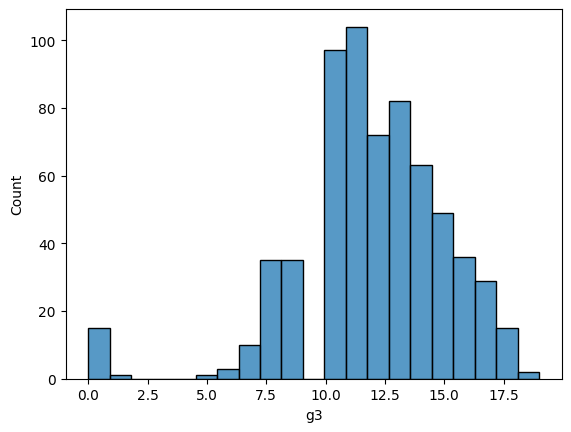

In [234]:
sns.histplot(df.g3)

<Axes: xlabel='g3', ylabel='Count'>

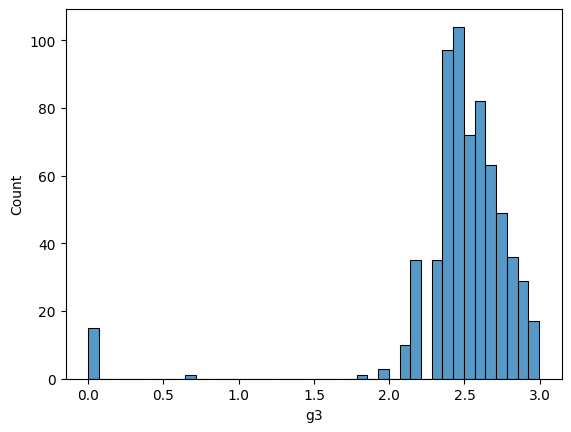

In [235]:
sns.histplot(np.log1p(df.g3))

In [236]:
df.isnull().sum().T

school        0
sex           0
age           0
address       0
famsize       0
pstatus       0
medu          0
fedu          0
mjob          0
fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
dalc          0
walc          0
health        0
absences      0
g1            0
g2            0
g3            0
dtype: int64

### 3. Validation framework

In [237]:
n = len(df)

n_val = int(n * 0.2)
n_test = int(n * 0.2)
n_train = n - n_val - n_test

n_train, n_val, n_test

(391, 129, 129)

In [238]:
idx = np.arange(n)

np.random.seed(3)
np.random.shuffle(idx)

In [239]:
df_train = df.iloc[idx[:n_train]]
df_val = df.iloc[idx[n_train: n_train + n_val]]
df_test = df.iloc[idx[n_train + n_val:]]

len(df_train), len(df_val), len(df_test)

(391, 129, 129)

In [240]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [241]:
y_train = np.log1p(df_train.g3.values)
y_val = np.log1p(df_val.g3.values)
y_test = np.log1p(df_test.g3.values)

In [242]:
del df_train["g3"]
del df_val["g3"]
del df_test["g3"]

### 4. X preparation

In [243]:
cat_vars = df_train.dtypes[df.dtypes == "object"].index
num_vars = df_train.dtypes[df.dtypes != "object"].index
num_vars

Index(['age', 'medu', 'fedu', 'traveltime', 'studytime', 'failures', 'famrel',
       'freetime', 'goout', 'dalc', 'walc', 'health', 'absences', 'g1', 'g2'],
      dtype='object')

In [244]:
cat_cols = {}

for c in cat_vars:
    cat_cols[c] = list(df_train[c].value_counts().index)

cat_cols

{'school': ['gp', 'ms'],
 'sex': ['f', 'm'],
 'address': ['u', 'r'],
 'famsize': ['gt3', 'le3'],
 'pstatus': ['t', 'a'],
 'mjob': ['other', 'services', 'at_home', 'teacher', 'health'],
 'fjob': ['other', 'services', 'at_home', 'teacher', 'health'],
 'reason': ['course', 'home', 'reputation', 'other'],
 'guardian': ['mother', 'father', 'other'],
 'schoolsup': ['no', 'yes'],
 'famsup': ['yes', 'no'],
 'paid': ['no', 'yes'],
 'activities': ['no', 'yes'],
 'nursery': ['yes', 'no'],
 'higher': ['yes', 'no'],
 'internet': ['yes', 'no'],
 'romantic': ['no', 'yes']}

In [245]:
def prepare_X(df):
    df_num = df.copy()

    features = list(num_vars)
    for n, l in cat_cols.items():
        for v in l:
            df_num[f"{n}_{v}"] = (df_num[n] == v).astype(int)
            features.append(f"{n}_{v}")
    
    df_num = df_num[features].fillna(0)
    X = df_num.values

    return X

In [246]:
X_train = prepare_X(df_train)
X_train

array([[17,  2,  4, ...,  0,  0,  1],
       [16,  4,  2, ...,  0,  0,  1],
       [17,  3,  3, ...,  0,  1,  0],
       ...,
       [16,  2,  2, ...,  1,  0,  1],
       [16,  2,  3, ...,  0,  1,  0],
       [16,  1,  1, ...,  0,  1,  0]], shape=(391, 58))

### 5. Model training
$$ g(x_i) = w_0 + x_i^T w \approx y $$
$$ g(x) = Xw \approx y $$
$$ w = (X^{T}X)^{-1} X^T y $$

In [247]:
def train_linreg(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)

    return w_full[0], w_full[1:]

In [248]:
X_train = prepare_X(df_train)
w0, w = train_linreg(X_train, y_train)
y_pred = w0 + X_train.dot(w)
y_pred

array([  4., -18.,  -2., -16.,   6., -16., -18., -14., -22.,  10.,  -2.,
       -14.,   2.,  18., -10.,  10.,   4., -38.,  20., -22., -14.,   2.,
       -42., -22., -38.,  10., -10.,   6.,   4.,   6.,   4.,  -6.,  -8.,
       -16.,  -6.,   6.,  -4., -14., -12., -32., -28., -18.,   4., -26.,
       -20., -18., -34., -10., -14., -20.,  14.,   8., -24.,   4.,   8.,
       -14.,  16.,   8., -26.,  28.,  -8.,  -4.,  12., -34., -10., -24.,
        18., -12.,  -8., -14.,  12., -26., -24.,   2.,   2.,  38., -12.,
       -24., -10., -24.,   0.,  -8., -20.,  18., -34.,  -6.,  18., -16.,
        16., -10., -14.,  -8.,  -2.,   2.,  10.,  -6.,  -8., -12.,   6.,
       -32.,  10., -22.,   4., -24.,  -2., -28., -12., -10.,   6.,  10.,
       -32.,  22., -18.,  -8., -16., -20.,  -6., -24.,  28.,  16., -16.,
       -30.,  -2.,   0.,  -6.,  -2.,  22.,   0., -22., -16., -24., -30.,
       -26.,   2., -32.,  -6., -20., -12., -24.,   0.,  -2., -10., -16.,
       -24., -24., -12.,  -8., -16.,  -8., -12., -1

<Axes: ylabel='Count'>

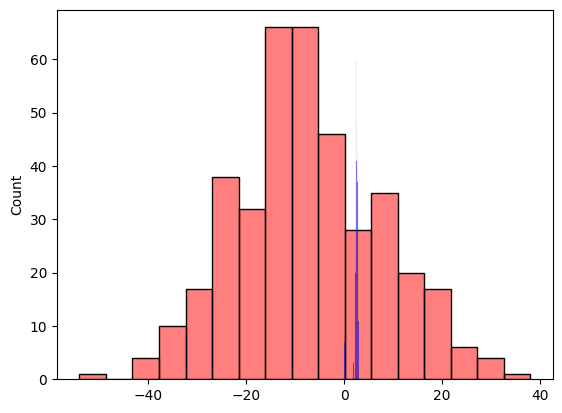

In [249]:
sns.histplot(y_pred, color="red", alpha=0.5)
sns.histplot(y_train, color="blue", alpha=0.5)

### 6. RMSE

$$ \sqrt{\sum_{i=1}^m \frac{(y_i - g(x_i))^2}{m}} $$

In [250]:
def rmse(y, y_pred):
    se = (y - y_pred) ** 2
    mse = se.mean()
    return np.sqrt(mse)

In [251]:
rmse(y_train, y_pred)

np.float64(17.836894483552943)

### 7. Regularization

In [252]:
def train_linreg(X, y, r=0.01):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX = XTX + r * np.eye(XTX.shape[0])
    
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)

    return w_full[0], w_full[1:]

In [253]:
for r in (0.0, 0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 10):
    X_train = prepare_X(df_train)
    w0, w = train_linreg(X_train, y_train, r)
    y_pred = w0 + X_train.dot(w)
    score = rmse(y_train, y_pred)
    display(score)

np.float64(17.836894483552943)

np.float64(0.23105340114811404)

np.float64(0.23105340115116707)

np.float64(0.2310534014568852)

np.float64(0.23105343196819966)

np.float64(0.23105642367171536)

np.float64(0.23130455379334694)

np.float64(0.23817636989067836)

In [254]:
r = 0.001
X_train = prepare_X(df_train)
w0, w = train_linreg(X_train, y_train, r)
y_pred = w0 + X_train.dot(w)
score = rmse(y_train, y_pred)
score

np.float64(0.2310534014568852)

In [255]:
np.expm1(y_train[21]), np.expm1(y_pred[21])

(np.float64(14.999999999999998), np.float64(15.726871329262599))

### 8. Validation

In [256]:
r = 0.001
X_train = prepare_X(df_train)
w0, w = train_linreg(X_train, y_train, r)

X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)
score = rmse(y_val, y_pred)
score

np.float64(0.37048229771687846)

<Axes: ylabel='Count'>

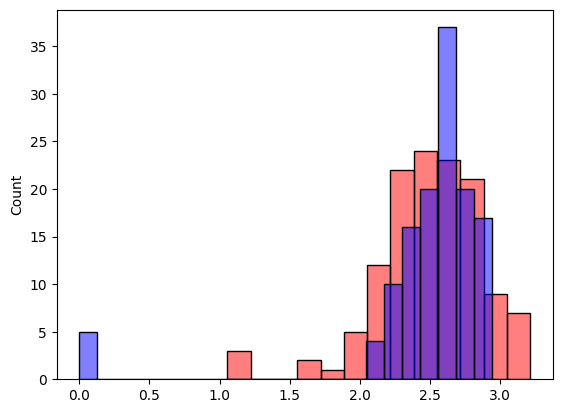

In [257]:
sns.histplot(y_pred, color="red", alpha=0.5)
sns.histplot(y_val, color="blue", alpha=0.5)

### 9. Testing

In [258]:
df_full_train = pd.concat([df_train, df_val])
y_full_train = np.concatenate([y_train, y_val])

In [259]:
r = 0.001
X_full_train = prepare_X(df_full_train)
w0, w = train_linreg(X_full_train, y_full_train, r)

X_test = prepare_X(df_test)
y_pred = w0 + X_test.dot(w)
score = rmse(y_test, y_pred)
score

np.float64(0.32513220854018776)

<Axes: ylabel='Count'>

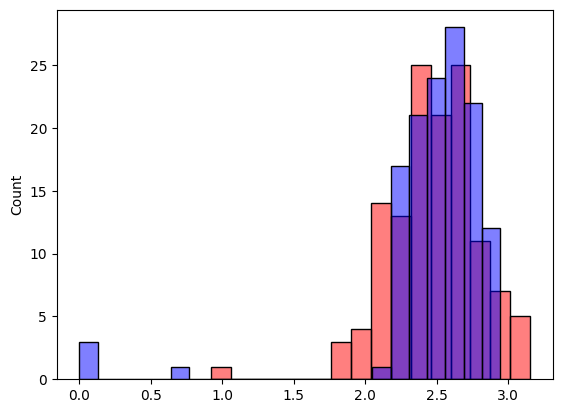

In [260]:
sns.histplot(y_pred, color="red", alpha=0.5)
sns.histplot(y_test, color="blue", alpha=0.5)

### 10. Using

In [261]:
student_id = 25
student = df_test.iloc[student_id].to_dict()
student

{'school': 'gp',
 'sex': 'm',
 'age': 15,
 'address': 'u',
 'famsize': 'gt3',
 'pstatus': 't',
 'medu': 2,
 'fedu': 2,
 'mjob': 'other',
 'fjob': 'other',
 'reason': 'home',
 'guardian': 'mother',
 'traveltime': 1,
 'studytime': 1,
 'failures': 0,
 'schoolsup': 'no',
 'famsup': 'yes',
 'paid': 'no',
 'activities': 'no',
 'nursery': 'yes',
 'higher': 'yes',
 'internet': 'yes',
 'romantic': 'no',
 'famrel': 4,
 'freetime': 2,
 'goout': 2,
 'dalc': 1,
 'walc': 2,
 'health': 5,
 'absences': 8,
 'g1': 11,
 'g2': 12}

In [262]:
df_student = pd.DataFrame([student])
y_target = np.expm1(y_test[student_id])
df_student

,school,sex,age,address,famsize,pstatus,medu,fedu,mjob,fjob,...,romantic,famrel,freetime,goout,dalc,walc,health,absences,g1,g2
0,gp,m,15,u,gt3,t,2,2,other,other,...,no,4,2,2,1,2,5,8,11,12


In [268]:
r = 0.001
X_full_train = prepare_X(df_full_train)
w0, w = train_linreg(X_full_train, y_full_train, r)

X_student = prepare_X(df_student)
y_pred = w0 + X_student.dot(w)
y_pred = np.expm1(y_pred[0])
print(f"student_{student_id} \nprediction: {round(y_pred, 2)} \ttarget: {y_target}")

student_25 
prediction: 13.49 	target: 12.0
